# Euler's Method for Initial-Value Problems

## Overview, Objectives, and Key Terms
 
In this lecture, we review the basics of *first-order*, *ordinary differential equations* and their role in *initial value problems*.  Some of the basic solution techniques 

revisit the tools provided by SymPy and apply them to solution of *ordinary differential equations* (ODEs).  Engineering is full of ODEs, since they are fundamental to the language of balance relationships found in heat transfer, nuclear reactor physics, control systems, and other areas.  The goal here is *not* to present the theory of ODEs, nor is it to present the various systematic ways be which one can determine solutions to ODEs.  Rather, the focus is placed squarely on defining ODEs symbolically, solving them symbolically, and, *importantly*, applying initial or boundary conditions to those  symbolic solutions and solving the resulting *algebraic* equations for any undetermined coefficients.  In other words, the focus is on the *problem solving* process.


### Objectives

By the end of this lesson, you should be able to

- Define first-order IVPs given engineering input (e.g., a description of some system)
- Solve first-order IVPs analytically (prior knowledge in part)
- Solve first-order IVPs numerically using the forward-Euler and backward-Euler methods.

### Prerequisites

You should already have a basic comprehension of ODEs, especially IVPs, at the level covered in MATH 340 (now a pre-requisite for this course).  That includes deducing general solutions, applying initial conditions, and determining complete solutions.  In fact, you should also know something about Laplace transforms and Euler's method, the latter technique which is the focus of this lesson.  Specifically, you should, given a day or two of review, be able to sit down and complete a good chunk of an exam like [this one](https://www.math.ksu.edu/courses/exam-archive/math240/Math240fxS17.pdf) at a passing level.  If that is *not* the case, see an instructor in office hours and/or begin to review the [MATH 340 textbook](https://www.math.ksu.edu/math240/book/).


### Key Terms

- differential equation
- ordinary
- linear
- ODE
- initial value problem
- boundary value problem

## Differential Equations

A *differential equation* is any equation in which an unknown function $f$ appears with one of more of its derivatives.  When $f$ is a function of only one variable, the derivatives are *ordinary* (as opposed to *partial*), and the equation is an *ordinary differential equation* (ODE).  In compact notation, such an equation may be written
\begin{equation}
    \mathcal{L}f(x) = q(x) \, ,
\end{equation}
where $\mathcal{L}$ is a differential operator.  If $\mathcal{L}$ contains only *linear combinations* of $f(x)$ and its derivates, then $\mathcal{L}$ is a *linear operator*, and the equation is a *linear* ODE.  If $q(x) = 0$, the equation is *homogeneous* and is otherwise *inhomogeneous*.  If the highest derivative of $f(x)$ present in $\mathcal{L}f$ is $n$ (i.e., $d^n f/dx^n$), then the equation is called an *n*th-order equation.

Examples of linear operators include $\mathcal{L}f = \frac{df}{dx}$ and $\mathcal{L}f = a(x) \frac{d^2f}{dx^2} + b(x)$, where $a(x)$ and $b(x)$ are arbitrary functions of $x$ (but not of $f(x)$).  For comparison, a nonlinear example is $\mathcal{L}f = \left ( \frac{df}{dx} \right )^2 - \sqrt{f(x)}$, which includes nonlinear functions of $f$ and its first derivative.

Our focus here and the next module is entirely on *ordinary differential equations* (both linear and nonlinear) and their solution by analytic and numerical techniques.

## Whence Comes $y'+py=q$?

Consider problems of the form

$$
    \frac{dy}{dt} + p(t)y(t) = q(t) \, , \qquad y(0) = y_0 \, .
$$

This is the canonical way to represent a **first-order**, **linear**, **initial-value problem** (IVP). It is first order because there is only a first derivative.  It is an initial-value problem because the unknown (here, $y(t)$) is specified at some "initial" time.  It is linear because $p(t)$ does not depend on $y(t)$.

A first-order IVP can be used to represent of a number of physical phenomena.  The first that comes to mind (to me, as a nuclear engineer) is [radioactive decay](https://en.wikipedia.org/wiki/Exponential_decay) with external production, usually written $N' = -\lambda N(t) + R(t)$, where $N(t)$ is the number of radioactive nuclei at time $t$, $\lambda$ is the decay constant (with units of inverse seconds), and $R(t)$ is the number of new nuclei born per second.  The time rate of change of $N(t)$ is a balance of those new nuclei from $R(t)$ against the number $-\lambda N(t)$ lost by decay.  For sufficiently long times, $dy/dt \to 0$, and $y = R/\lambda$, a *steady state* in which losses are exactly balanced by gains.

An equally good example is the case of an object of mass $m$ in [free fall through a viscuous medium](http://hyperphysics.phy-astr.gsu.edu/hbase/lindrg.html), e.g., the atmosphere.  If some object is held a distance above the earth and dropped, its acceleration at any point in time is related to the net forces acting on the body.  These forces include the gravitational force $F_g = -m g$ (i.e., downward) and the air resistance $F_r$.  A simple resistance model is $F_r = cv$, where $c$ is a (positive) constant and $v$ is the velocity directed toward Earth. Hence,
the downward force is 

$$
  F(t) = -cv(t) + m g \, .
$$

From Newton's second law, $F = ma$, so we have

$$
    ma(t) = m \frac{dv}{dt} = -cv(t)  + mg \, ,
$$

or

$$
    v' = -\frac{c}{m} v(t) + g \, .
$$

The positive $c/m$ has the same effect as a positive $\lambda$ in radioactive decay: the larger the velocity $v$, the larger the retardation force $cv$ (just like the larger the number of nuclei $N$, the larger the number $\lambda N$ decaying per unit time).  For the free-fall case, the steady-state condition $v'=0$ has a special name: *terminal velocity*.  

Lots of phenomena have this sort of behavior, this natural *negative feedback*, and such feedback can help us when we solve these problems numerically.  In those cases where the feedback is *positive*, we expect the number of nuclei to *grow* more and more (or, equivalently, for a falling object to keep accelerating toward earth).  The former happens when pythons (or neutrons) multiply in nature; thankfully, the [hail of northeastern Kansas](https://en.wikipedia.org/wiki/April_10%E2%80%9311,_2001_tornado_outbreak#Tri-state_hailstorm) does reach a terminal velocity.  Oh, and I'm not joking about pythons: combine the  [Malthusian model](https://en.wikipedia.org/wiki/Malthusian_growth_model) with the fact there is an artificial source term due to pet owners releasing their larger-than-expected pets into the [Florida Everglades](https://en.wikipedia.org/wiki/Burmese_pythons_in_Florida).

***

**Exercise**:  Solve $\frac{dy}{dt} = ay(t)$ with $y(0) = y_0$.

*Solution*: Rearrange the equation to be 

$$
  \frac{1}{y}dy = a dt \, ,
$$

and then integrate to obtain

$$
   \ln(y) = a t + C' \, .
$$

Here, $C'$ is an arbitrary integration constant.  Exponentiation of both sides results in

$$
  y(t) = e^{at + C'} = C e^{at} \, ,
$$

where $C = e^{C'}$ is still an arbitrary constant. 

So far, this is just *integral calculus*.  To solve the given IVP, we need to *apply the initial condition* (IC).  Specifically, we need to specify $C$ that satisfies $y(0) = C e^{0} = y_0$.  Clearly, $C = y_0$.

***

**Exercise**:  Solve $\frac{dy}{dt} + py(t) = q$ subject to $y(0) = y_0$ where $p$ and $q$ are constant.

*Solution*: This standard problem is solved by use of an *integration factor*.  Sure, there is a formula you can memorize, but I have a bad memory.  What I do remember is that we want to find some integration factor $\mu(t)$ such that

$$
  \frac{d}{dt}[\mu(t) y(t)]  = \mu(t) q\, .
$$

*Why*?  We've turned the original problem into one for which both sides ($\mu q$ and $\frac{d}{dt}[\mu y]$) can be directly integrated  like we did for $y'=ay$!  Let's apply the product rule:

$$
\frac{d}{dt}[\mu(t) y(t)] = \frac{d\mu}{dt} y(t) + \mu(t) \frac{dy}{dt} = \mu(t) q \, .
$$

By comparison to the original equation, we need

$$
   \frac{d\mu}{dt} y(t) + \mu(t) \frac{dy}{dt} = \mu(t) \frac{dy}{dt} + \mu(t) py(t) \, ,
$$

or 

$$
 \frac{d\mu}{dt} =  \mu(t) p \longrightarrow \frac{d\mu}{\mu} = p dt \longrightarrow \ln \mu =  p t 
$$

or

$$
   \mu(t) = e^{pt} \, .
$$

Finally, integrate the IVP from $0$ to $t$, making sure to use the dummy variable $t'$ inside the integrals:

$$
\begin{split}
  \int^{t}_{0} \frac{d}{dt'}[\mu(t') y(t')] dt' &= \int^{t}_{0} \mu(t') q dt' \\
  \int^{t}_{0} \frac{d}{dt'}[e^{pt'} y(t')] dt' &= \int^{t}_{0} e^{pt'} q dt' \\
  e^{pt} y(t) - e^{0}y(0) &= \frac{q}{p} [e^{pt}-e^{0}] \\
  e^{pt} y(t) - y(0) &= \frac{q}{p} [e^{pt}-1] \, .
\end{split}
$$

A bit of rearranging then leads to 

$$
  y(t) = \frac{q}{p} [1 - e^{-pt}] + y(0)e^{-pt} \, .
$$

Of course, this is the result some of you might have memorized, but working through it with the goal of being able to *integrate the equation directly* might shed some new light on (or simply remind you of) the origin of the formula.  

***

**Exercise**: Check that the solution found for $y' + py = q$ actually solves the IVP by substitution of the result into the original equation.

***

**Exercise**:  Consider  $v' = -\frac{c}{m} v(t) + g$.  Can you determine the *terminal velocity* (i.e., the velocity obtained when the falling object is no longer accelerating) *without* solving the IVP?  If not, go ahead and solve the IVP.

***

**Exercise**: My kid *hates* hot food, so if I make him my (absolute delicious grilled-cheese sandwich with 100% real Wisconsin cheese [of course]), I've got to let it cool down to approximately room temperature (say 70 ${}^{\circ}$F).  If immediately after grilling it, the sandwich is 150 ${}^{\circ}$F, and  5 minutes later, it is 100${}^{\circ}$, **how much longer do I have to let it cool?**  Assume that Newton's law of cooling, $T' = k(T-T_m)$, applies.  (Hint: you *do* have enough information to solve this problem.)

***

**Exercise**: Radio-carbon dating is a technique used to determine how old fossils are.  The technique is based on the fact that the radioactive isotope C-14 is produced in the atmosphere at an approximately constant rate.  Living, breathing creatures have C-14 at levels consistent with the atomosphere.  Dead, fossilized creatures have C-14 levels that decrease over time.  The *half life* of C-14 is about 5600 years, meaning that every 5600 years, the amount of C-14 in the fossil will decrease by half.  Use this number and the simple model $N' = -\lambda N(t)$ (where $N$ represents the amount of C-14) to determine $\lambda$.  Then, determine how old a fossil must be if its C-14 concentration is only 1/100 of that of a living creature.

***

**Exercise**:  Try solving the *nonlinear* logistics equation: $y' = y(t)[a - by(t)]$ with $y(0) = y_0$.   This model extends the exponential growth model $y'/y = a$ by  $y'/y = a - by$.  The $-by$ term represents some sort of inhibitor for unbounded growth.  Think about it: unbounded growth would require unbounded resources.  In the real world, those resources are not available, and so there tends to be muted growth as populations become very large.  This reduction in the grown rate can be modeled as being proportional to the population itself, leading to this nonlinear model.  Plot the solution for $y(0) = 1$, $a = 1$, and $b = 0$ and $b = 1$.  Notice a difference?

***


## The General Problem $y' = f(y(t), t)$

The general form of a first-order, ordinary differential equation is

$$
  \frac{dy}{dt} = f(y(t), t) \, ,
$$

where $f(y(t), t)$ is a function of both $t$ and $y(t)$.  For the standard linear problem with constant coefficients ($y' + py = q$), we may write

$$
  \frac{dy}{dt} = f(y(t), t) \qquad \text{where} \qquad f(y(t), t) = q - py(t) \, .
$$

If $f(y(t), t)$ is a *linear* function of $f(t)$, then the IVP is also linear; otherwise, the IVP is nonlinear.


For this and the next lesson, the general form $y' = f(y(t), t)$ will be used exclusively.

## There Once was a Man Named Euler

[Leonhard Euler](https://en.wikipedia.org/wiki/Leonhard_Euler) was a prolific mathematician, perhaps second only to [Carl Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss).  I point him out because the simplest (and probably best known) approach for solving $y' + py = q$ has his name.  (Point of trivia: he's buried in St. Petersburg, I was quite surprised to learn while strolling through an old cemetery).

The method bearing his name requires the numerical differentiation we learned previously.  Specifically, we need one of the first-order, finite-difference approximations for $dy/dt$.  You'll recall those are the *forward difference*

$$
    \frac{dy}{dt} = \frac{y(t+\Delta)-y(t)}{\Delta} + \mathcal{O}(\Delta) \, ,
$$

and the *backward difference*

$$
    \frac{dy}{dt} = \frac{y(t)-y(t-\Delta)}{\Delta} + \mathcal{O}(\Delta) \, .
$$

If we substitute the forward difference into the general IVP (i.e., $y' = f(y(t),t)$), we find

$$
    \frac{y(t+\Delta)-y(t)}{\Delta} = f(y(t), t) + \mathcal{O}(\Delta) \, ,
$$

and by isolating $y(t+\Delta)$ on the left, we have

$$
    y(t+\Delta) = \Delta f(y(t), t) + y(t)  + \mathcal{O}(\Delta^2)  \, .
$$

In other words, if we know the value of $y(t)$ at time $t$, then we can estimate its values at the future time $t+\Delta$.  We only need *old* information, the information at time $t$.  This is called the *forward Euler* method.  We march forward in time using only old information.  

Alternatively, substitute the *backward difference* into the IVP to find

$$
    y(t) = \Delta f(y(t), t) + y(t-\Delta)  + \mathcal{O}(\Delta^2)  \, .
$$

To compute $y(t)$, we still need *some* old information, and in this case, that old information is $y(t-\Delta)$.  However, the value of $y(t)$ at time $t$ *also depends on itself* through the term $f(y(t), t)$.  This dependence can make the *backward Euler* method a bit more challenging to apply, but as we'll see below, we'll get a numerical solution with improved *stability*.

***

**Exercise**:  Consider $y' = q - py(t)$ where $p$ and $q$ are constant.  Given the value of $y(t_0)$, determine $y(t_0+\Delta)$ using  the *forward Euler* method.

*Solution*: From above, we have 

$$
\begin{split}
y(t_0 + \Delta) &= \Delta f(y(t_0), t_0) + y(t_0) \\
                &= \Delta(q - py(t_0)) + y(t_0) \\
                &= \Delta q + [1 - \Delta p]  y(t_0) \, .
\end{split}
$$

**Exercise**:  Consider $y' = q - py(t)$ where $p$ and $q$ are constant.  Given the value of $y(t_0)$, determine $y(t_0+\Delta)$ using  the *backward Euler* method.

*Solution*: From above, we have

$$
y(t) = \Delta f(y(t), t) + y(t-\Delta) \, .
$$

Substitute $t = t_0 + \Delta$ into this equation to find

$$
\begin{split}
y(t_0 + \Delta) &= \Delta f(y(t_0+\Delta), t_0+\Delta) + y(t_0) \\
                &= \Delta(q - py(t_0+\Delta)) + y(t_0) \, . \\
\end{split}
$$

By isolating $y(t_0+\Delta)$ on the left, we find

$$
[1 + \Delta p] y(t_0 + \Delta)   =  \Delta q + \Delta y(t_0) \, ,
$$

and, hence,

$$
 y(t_0 + \Delta)   = \frac{ \Delta q + \Delta y(t_0)}{1 + \Delta p} \, .
$$

***

**Exercise**: Consider $y' = q - p\sqrt{y(t)}$ where $p$ and $q$ are constant.  Given the value of $y(t_0)$, determine $y(t_0+\Delta)$ using  the *backward Euler* method.

*Solution*: The basic process is the same as the last example, but we cannot isolate $y(t_0+\Delta)$ on the left-hand side.  Rather, what results is the following, nonlinear equation:

$$
 \overbrace{y(t_0 + \Delta) + \Delta p\sqrt{y(t_0+\Delta)} - \Delta q -  y(t_0) = 0}^{g(y(t_0+\Delta))\,=\, 0} \, .
$$

To determine $y(t_0+\Delta)$ requires the root is found.  Here, the problem is a quadratic (note that $ay + by^{1/2} + c$ is equivalent to $ax^2 + bx + c$ for $x^2 = y$).

***


## Chopping Up Time

To determine $y(t)$ at multiple times, we must divide time into discrete points starting from the initial time $t_0$.  If a fixed time step $\Delta$ is used, then $y$ is now evaluated at the points $t_0, t_0+\Delta, t_0+2\Delta, \ldots$, or

$$
    t_n = t_0 + n\Delta, \qquad n = 0, 1, 2, \ldots
$$

We could allow for a $\Delta$ that changes, but we'll keep it fixed for simplicity and leave the fancy stuff to SciPy in the next lesson.  With this notation, the forward Euler method can be written as

$$
    y_{n+1} =  \Delta f(y_n, t_n) + y_n \, , \qquad n = 0, 1, 2, \ldots
$$

while the backward Euler method can be written as

$$
    y_{n+1}  = \Delta f(y_{n+1}, t_{n+1}) + y_n \, , \qquad n = 0, 1, 2, \ldots
$$

How high should $n$ go?  It depends on how long into the future (taking $t$ to represent time) we wish to evaluate the solution.  Let that future time be denoted $T$, and let the number of steps we wish to take be denoted $N$.  Consequently, $\Delta = (T-t_0)/N$.  We'll always start at $t=0$, so $\Delta = T/N$.

***

**Exercise**:  Solve $y' + y(t) = 10$ for $y(0) = 0$, $t \in [0, 10]$, and $N=25$ with the forward-Euler method.  Plot the numerical result along with the analytic solution $y(t) = 10 - 10e^{-t}$. 

*Solution*: First, rearrange to get $y' = f(y(t), t) = 10 - y(t)$.  The exact solution can be found using the integration-factor technique shown in a solved exercise above.  The rest can then be done in code.

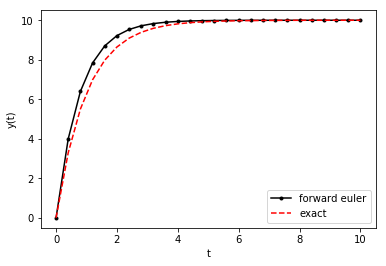

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 25                      # number of steps beyond the IC
t = np.linspace(0, 10, N+1) # +1 to include IC
Delta = t[1]-t[0]           # constant time step
y = np.zeros(N+1)           # +1 to include IC
y[0] = 0.0                  # set the IC

for i in range(0, 25):
    f_i = 10.0 - y[i]          # define f(y_i, t_i)
    y[i+1] = Delta*f_i + y[i]  # forward Euler step
    
y_exact = 10 - 10*np.exp(-t) # exact solution

plt.plot(t, y, '-k.',t, y_exact, 'r--')
plt.legend(['forward euler', 'exact'])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

***

**Exercise**: Repeat the last exercise using the backward Euler.

***

**Exercise**:  Use either backward Euler or forward Euler to solve the last example for $\Delta = 10/25$, $10/250$, and $10/2500$.  How does the *absolute error* in $y(10)$ change with $\Delta$?  Does that seem reasonable?

***

***

**Exercise**:  Finish the following function definition:

```python

def forward_euler(f, y0, t) :
    """Solves y' = f(y(t), t) using forward Euler at the given times.
    
       Inputs:
         f  - right-hand side function (callable function)
         y0 - initial value of y (float)
         t  - times at which to compute y(t), including t0, (NumPy array)
         
       Returns:
         y  - values of y at each time step (NumPy array)
    """

    return y
```

***

**Exercise**: Implement backward Euler following the exercise above.  Note, because $f(y(t), t)$ can in general be nonlinear, you'll need to incorporate a root-finding algorithm, e.g.,  bisection or Newton.  Alternatively, use `fsolve`.

***

**Exercise**:  Apply forward Euler *by hand* to the following IVPs to approximate $y(1)$ using a step size $\Delta = 0.2$:
  1. $y' = y$ for $y(0) = 1$. 
  2. $y' = 2ty$ for $y(0) = 1$
  3. $y' = -y/10 + 1$ for $y(0) = 0$.

***

**Exercise**: Repeat the previous exercise but use backward Euler.

***

**Exercise**:  Consider $y' = y$, $y(0) = 1$.  Of course, the solution is $y(x) = e^x$.  Let $\Delta = 1/N$ and $x_i = \Delta i$, where $N$ is some integer.  If $y_i$ is the approximation of $y(x)$ at $x = x_i$, then prove that $\lim_{N\to \infty} y_N = e$ for both forward Euler and backward Euler.

***


**Exercise**:  Consider the IVP $y' = f(t, y(t))$ subject to $y(0) = y_0$.  Here, $f(t, y(t))$ can be any function of $t$ or $y(t)$.  Examples include $f(t, y(t)) = ay + bt$ and $f(t, y(t)) = a y(t)^2$.  The latter case leads to a *nonlinear* IVP.  Given the initial condition, write down how you would determine $y(\Delta)$ using (a) forward Euler and (b) backward Euler.

***

**Exercise**:  Consider the following twist on Euler's method for $\frac{dy}{dt} = f(t)$ using fixed time steps $\Delta$:

$$
  \tilde{y}_{n+1} = y_n + \Delta f(t_n)
$$

and

$$
  y_{n+1} = y_n + \frac{\Delta}{2} [f(t_n) + \tilde{f}(t_{n+1})] \, .
$$

This is an example of a [multi-step method](https://en.wikipedia.org/wiki/Linear_multistep_method) and belongs to the famous [Runge-Kutta](http://mathworld.wolfram.com/Runge-KuttaMethod.html) family of methods.  This particular version is sometimes called [Heun's method](https://en.wikipedia.org/wiki/Heun%27s_method). 

Your task is to write a function `heun_method(f, y0, t)` where `f` is a callable function, `y0` is the initial condition, and `t` is an array of times at which the solution is to be computed.

***

## A Look at Errors and Stability (Optional)

Consider $y' = 2 - y$ with $y(0) = 1$,  the solution of which is $y(t) = 2 - e^{-t}$.  Solution of the same problem using forward Euler and either 25 or 100 points over $t\in [0, 10]$ leads to the following:

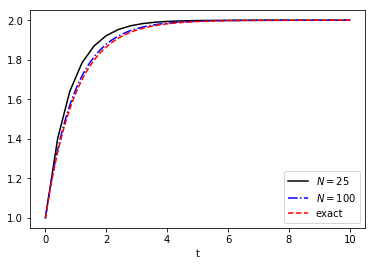

In [2]:
import numpy as np
import matplotlib.pyplot as plt
t25 = np.linspace(0, 10, 26)
t100 = np.linspace(0, 10, 101)
y25 = np.zeros(26); y25[0] = 1.0
y100 = np.zeros(101); y100[0] = 1.0
for i in range(25):
    y25[i+1] = (10/25.0)*(2.0 - y25[i]) + y25[i]
for i in range(100):
    y100[i+1] = (10/100.0)*(2.0 - y100[i]) + y100[i]
yexact = 2 - np.exp(-t100)
plt.plot(t25, y25, 'k-', t100, y100, 'b-.', t100, yexact, 'r--')
plt.legend(['$N=25$', '$N=100$', 'exact'])
plt.xlabel('t')
plt.show()

Certainly, the $N=100$ approximation looks better than the $N=25$ approximation. We can also plot the errors for both as a function of time:

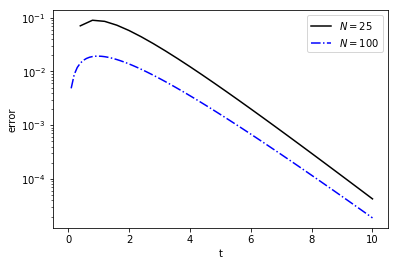

In [3]:
error25 = y25 - (2 - np.exp(-t25))
error100 = y100 - (2 - np.exp(-t100))

plt.semilogy(t25, error25, 'k-', t100, error100, 'b-.')
plt.xlabel('t')
plt.ylabel('error')
plt.legend(['$N=25$', '$N=100$'])
plt.show()

Clearly, the error for $N=25$ is larger over the time domain, as we might expect.  Recall that 
$(y_{n+1}-y_n)/\Delta = -py_n + q + \mathcal{O}(\Delta)$, so $y_{n+1} = (1-\Delta p)y_n + \Delta q + \mathcal{O}(\Delta^2)$.  This second-order error in $y_n$ is the *local error*, i.e., the error introduced by a single step in time.  On the other hand, the *global error* is the error shown above as a function of time.  A key question is how that global error at a fixed point in time depends on $\Delta$.   

We can attack the global error for our simple problem.  For constant $q$, $p$ and $\Delta$, the analytic solution is

$$
    y_n = \frac{q}{p} (1 - e^{-p \Delta n})  \, ,
$$

while the forward-Euler solution is

$$
    \begin{aligned}
     y^{FE}_n  &= \Delta q \sum^{n-1}_{i=0} (1-\Delta p)^{i} \\
          &= \Delta q \frac{1 - (1-\Delta p)^{n-1}}{\Delta p } \\
          &= \frac{q}{p} [ 1 - (1-\Delta p)^{n-1} ] \, .
    \end{aligned}
$$

For a given $t$ and $\Delta$, the number of steps is $n = t/\Delta$, and the global error is therefore

$$
     \varepsilon(t, \Delta) = y^{FE}(t) - y(t) = \frac{q}{p} [e^{-p t}-(1-\Delta p)^{\frac{t}{\Delta} - 1} ] \, .
$$

Note first that 

$$
     \lim_{\Delta \to 0} (1-\Delta p)^{t/\Delta} = e^{-p t} \, ,
$$

so $\varepsilon(t, \Delta) = (q/p)[e^{-pt}-e^{-p/t}/(1-\Delta p)] \to 0$ as $\Delta \to 0$.  That mean the approximate value *converges* to the correct value when the step size $\Delta$ vanishes.  

However, for fixed $t$, how *fast* does the error decrease with $\Delta$?  And for fixed $\Delta$, how does the error change with time?  Let's expand the error $\varepsilon(t, \Delta)$ about $\Delta = 0$:

$$
\begin{split}
\varepsilon(t, \Delta) &= \varepsilon(t, 0) + \frac{\partial \varepsilon}{\partial \Delta}\Big |_{\Delta = 0}  + \mathcal{O}(\Delta^2) \\
             &=  \Delta \left(\frac{p q}{2} t e^{- p t} - q e^{- p t}\right) + \mathcal{O}(\Delta^2) \\
             &= \mathcal{O}(\Delta) \, .
\end{split}      
$$

Evidently, the global error is of first order.  However, it's not clear (or easy to determine) exactly how the error depends on $t$ for fixed $\Delta$.  If we assume $p > 0$ (i.e., radioactive decay and not multiplying pythons), then 

$$
 \Big |\varepsilon(t, \Delta) \Big | < \Bigg | \frac{q}{p} \Bigg | \Bigg | (1-\Delta p)^{\frac{t}{\Delta} -1} \Bigg | \, .
$$

However, the right-hand side is bounded (i.e., does not grow with large $t$) only if $|1-\Delta p| < 1$, and that is true only if $\Delta < 2/p$.  To summarize: the global error does not blow up as long as $p > 0$ and $\Delta < 2/p$.

Of course, simply stating such rules is never as exciting as seeing what happens when the rules are broken, so we'll solve $y' = 2 - y$ with $y(0) = 0$ for $N = 4$, $N = 10$, and $N = 20$:

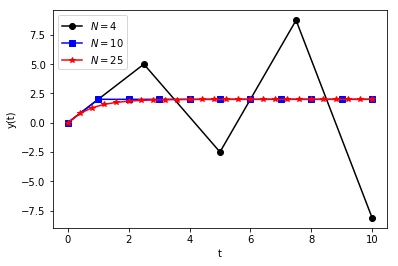

In [4]:
p = 1.0
q = 2.0
t = {}
y = {}
y0 = 0
for N in [4, 10, 25]:
    t[N] = np.linspace(0, 10, N+1)
    Delta = t[N][1]-t[N][0]
    y[N] = np.zeros(N+1)
    y[0] = y0
    for i in range(1, N+1):
        y[N][i] = (1.0 - Delta*p)*y[N][i-1] + Delta*q
    
plt.plot(t[4], y[4], 'k-o',  t[10], y[10], 'b-s', t[25], y[25], 'r-*')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend(['$N=4$', '$N=10$',  '$N=25$'], loc=0)
plt.show()

Yikes! The $N=4$ case clearly does not converge to the steady-state value $y = 1$!  In other words, it *diverges*.  Because the forward-Euler approximation converges only for certain values of $\Delta$ and $p$, it is called a *conditionally stable* method.  

Conditional stability requires very small $\Delta$.  For problems whose solutions blow up (i.e., $p < 0$), all bets are off and an *unconditionally stable* method is the better choice. For example, the backward-Euler approximation is unconditionally stable, demonstration of which is an exercise left to the student (i.e., repeat this study with backward Euler and show that $\varepsilon(t, \Delta)$ cannot blow up).

***

**Exercise**:  Repeat the example above (i.e., $p=1$, $q=1$, $y(0) = 0$, and $N = 4, 10, 25$) to show that backward Euler has no stability issues.

***

**Exercise**:  Use *backward Euler* to solve $y' = 2t - 3y + 1$ given $y(1) = 5$ and estimate $y(1.2)$.  Compare the error in this estimate for $\Delta = 0.1, 0.01, 0.001, 0.0001$.  How does this error depend on $\Delta$? 

***

**Exercise**:  Repeat the previous exercise using Heun's method (see a previous exercise).

***

## Further Reading

None.